In [1]:
#pip install textblob
#pip install vaderSentiment
#!pip install transformers
#!pip install nltk

In [2]:
# Roberta - hugging face.
# Vader
#https://www.kaggle.com/code/robikscube/sentiment-analysis-python-youtube-tutorial

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import nltk
# Download the 'punkt' tokenizer
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('maxent_ne_chunker_tab')


C:\Users\prana\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\prana\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
C:\Users\prana\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_da

True

In [4]:


from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# libraries for Bag of Words(BOW)
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

# import libraries for from sklearn.svm import SVC

from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
%run C:/Users/prana/Documents/NCI/PythonWorkSpace/functionsMaster.ipynb

Current working directory: C:\Users\prana\Documents\NCI\PythonWorkSpace\WearableDevices


In [6]:
df = pd.read_csv('../WearableDevices/Data/drug_review_test.csv')
df.head()


Unnamed: 0  patient_id         drugName                     condition  \
0           0      163740      Mirtazapine                    depression   
1           1      206473       Mesalamine  crohn's disease, maintenance   
2           2       39293         Contrave                   weight loss   
3           3       97768  Cyclafem 1 / 35                 birth control   
4           4      208087          Zyclara                     keratosis   

                                              review  rating  \
0  "i've tried a few antidepressants over the yea...    10.0   
1  "my son has crohn's disease and has done very ...     8.0   
2  "contrave combines drugs that were used for al...     9.0   
3  "i have been on this birth control for one cyc...     9.0   
4  "4 days in on first 2 weeks.  using on arms an...     4.0   

                date  usefulCount  review_length  
0  February 28, 2012           22             68  
1       May 17, 2009           17             48  
2      March 5, 2017           35            143  
3   October 22, 2015            4            149  
4       July 3, 2014           13             60

In [7]:
show_missing(df)

variable    dtype  count  unique  missing  pc_missing
0     Unnamed: 0    int64  46108   10000        0         0.0
1     patient_id    int64  46108   46108        0         0.0
2       drugName   object  46108    2283        0         0.0
3      condition   object  46108     652        0         0.0
4         review   object  46108   41467        0         0.0
5         rating  float64  46108      10        0         0.0
6           date   object  46108    3547        0         0.0
7    usefulCount    int64  46108     322        0         0.0
8  review_length    int64  46108     212        0         0.0

In [8]:
# remove duplicate rows in review column
# Remove duplicates from 'Column1'
df['review'] = df['review'].drop_duplicates().reset_index(drop=True)
show_missing(df)

variable    dtype  count  unique  missing  pc_missing
0     Unnamed: 0    int64  46108   10000        0        0.00
1     patient_id    int64  46108   46108        0        0.00
2       drugName   object  46108    2283        0        0.00
3      condition   object  46108     652        0        0.00
4         review   object  46108   41468     4641       10.07
5         rating  float64  46108      10        0        0.00
6           date   object  46108    3547        0        0.00
7    usefulCount    int64  46108     322        0        0.00
8  review_length    int64  46108     212        0        0.00

In [9]:
# drop missing rows 
# Drop rows where 'review' column has missing (NaN) values
df = df.dropna(subset=['review'])

In [10]:
show_missing(df)

variable    dtype  count  unique  missing  pc_missing
0     Unnamed: 0    int64  41467   10000        0         0.0
1     patient_id    int64  41467   41467        0         0.0
2       drugName   object  41467    2222        0         0.0
3      condition   object  41467     638        0         0.0
4         review   object  41467   41467        0         0.0
5         rating  float64  41467      10        0         0.0
6           date   object  41467    3540        0         0.0
7    usefulCount    int64  41467     319        0         0.0
8  review_length    int64  41467     208        0         0.0

In [12]:
df=df.head(10000) # select only 10,000 rows 
show_missing(df)


variable    dtype  count  unique  missing  pc_missing
0     Unnamed: 0    int64  10000   10000        0         0.0
1     patient_id    int64  10000   10000        0         0.0
2       drugName   object  10000    1381        0         0.0
3      condition   object  10000     436        0         0.0
4         review   object  10000   10000        0         0.0
5         rating  float64  10000      10        0         0.0
6           date   object  10000    2991        0         0.0
7    usefulCount    int64  10000     246        0         0.0
8  review_length    int64  10000     151        0         0.0

In [13]:
# EDA on the dataset 

# Group by the 'drugName' column and count occurrences
drug_counts = df.groupby(by=["drugName","condition"]).size().reset_index(name="counts")

# Filter the data to include only rows where counts > 200
filtered_drug_counts = drug_counts[drug_counts["counts"] >50]

# Create a bar chart using Plotly Express if there are any drugs with counts > 200

fig = px.bar(data_frame=filtered_drug_counts, x="drugName", y="counts",
             color='condition',
             title="Drugs with Counts Greater Than 200")
fig.show()





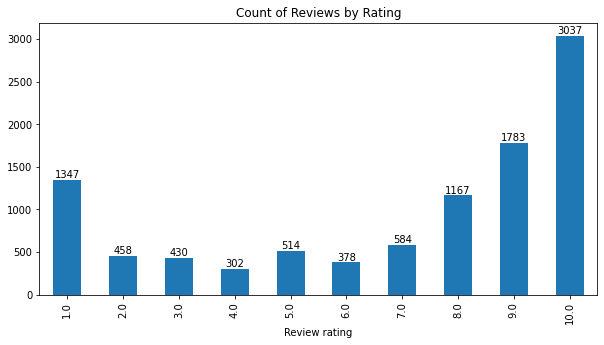

In [14]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Rating',
          figsize=(10, 5))

# Set the label for the x-axis
ax.set_xlabel('Review rating')

# Add labels on top of each bar
ax.bar_label(ax.containers[0])

# Display the plot
plt.show()

In [15]:
# Accessing a specific value in the 'review' and 'condition' columns at row indices 10 and 300
Example1= df['review'].iloc[10], df['condition'].iloc[10],df['rating'].iloc[10]
print(Example1)


('"honestly its day one on the 3 day treatment. yes it burns a bit and it does leak out if you dont lay down after insertion. but im faithful it will work."', 'vaginal yeast infection', 6.0)


In [16]:
Example2= df['review'].iloc[300], df['condition'].iloc[300],df['rating'].iloc[300]
print(Example2)

('"after the arduous task of getting pre-authorization for this drug, i paid $60 and it is not helping. i suffer from chronic insomnia and was looking for something to help me sleep more soundly and to wake up restored. ambien and trazadone where my go to combo and worked well for me aside from the restorative part. hence, the move to belsomra. i started with 10mg  and it did nothing. then i tried 20mg and it did assist with falling asleep eventually (at least 2 hours), but not staying asleep. i sleep off and on with this stuff and the dreams are pretty consistent, definitely not rem sleep. to anyone thinking of trying this drug, i\'d say save your money and keep looking."', 'insomnia', 1.0)


In [17]:
# NLTK

tokens = nltk.word_tokenize(df['review'].iloc[300], df['condition'].iloc[300],df['rating'].iloc[300])
tokens[:300]
#tokens[:300]

['``',
 'after',
 'the',
 'arduous',
 'task',
 'of',
 'getting',
 'pre-authorization',
 'for',
 'this',
 'drug',
 ',',
 'i',
 'paid',
 '$',
 '60',
 'and',
 'it',
 'is',
 'not',
 'helping.',
 'i',
 'suffer',
 'from',
 'chronic',
 'insomnia',
 'and',
 'was',
 'looking',
 'for',
 'something',
 'to',
 'help',
 'me',
 'sleep',
 'more',
 'soundly',
 'and',
 'to',
 'wake',
 'up',
 'restored.',
 'ambien',
 'and',
 'trazadone',
 'where',
 'my',
 'go',
 'to',
 'combo',
 'and',
 'worked',
 'well',
 'for',
 'me',
 'aside',
 'from',
 'the',
 'restorative',
 'part.',
 'hence',
 ',',
 'the',
 'move',
 'to',
 'belsomra.',
 'i',
 'started',
 'with',
 '10mg',
 'and',
 'it',
 'did',
 'nothing.',
 'then',
 'i',
 'tried',
 '20mg',
 'and',
 'it',
 'did',
 'assist',
 'with',
 'falling',
 'asleep',
 'eventually',
 '(',
 'at',
 'least',
 '2',
 'hours',
 ')',
 ',',
 'but',
 'not',
 'staying',
 'asleep.',
 'i',
 'sleep',
 'off',
 'and',
 'on',
 'with',
 'this',
 'stuff',
 'and',
 'the',
 'dreams',
 'are',
 'pret

In [18]:
def tokenniser_review(df,index):
    # Combine the values from 'review', 'condition', and 'rating' into one string
    combined_text = f"{df['review'].iloc[index]} {df['condition'].iloc[index]} {df['rating'].iloc[index]}"
    tokens = nltk.word_tokenize(combined_text)
    return tokens

tokenniser_review(df,10)

['``',
 'honestly',
 'its',
 'day',
 'one',
 'on',
 'the',
 '3',
 'day',
 'treatment',
 '.',
 'yes',
 'it',
 'burns',
 'a',
 'bit',
 'and',
 'it',
 'does',
 'leak',
 'out',
 'if',
 'you',
 'dont',
 'lay',
 'down',
 'after',
 'insertion',
 '.',
 'but',
 'im',
 'faithful',
 'it',
 'will',
 'work',
 '.',
 "''",
 'vaginal',
 'yeast',
 'infection',
 '6.0']

In [19]:
# https://pythonprogramming.net/part-of-speech-tagging-nltk-tutorial/
def postsOfSpeech_tag(df,index):
    combined_text = f"{df['review'].iloc[index]} {df['condition'].iloc[index]} {df['rating'].iloc[index]}"
    
    tokens = nltk.word_tokenize(combined_text)
    
    tagged = nltk.pos_tag(tokens)
    
    return tagged

tagged=postsOfSpeech_tag(df,10)

In [20]:
# TextBlob

# Function to get sentiment analysis
def text_blot(review):
    blob=TestBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Function to get sentiment analysis
def get_sentiment(review):
    blob = TextBlob(review)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the sentiment function to the 'drug_review' column

df[['polarity','subjectivity']]= df['review'].apply(lambda x: pd.Series(get_sentiment(x)))


df[['polarity','subjectivity']]=  df[['polarity','subjectivity']].round(2)
                                                        
print(df)


      Unnamed: 0  patient_id          drugName  \
0              0      163740       Mirtazapine   
1              1      206473        Mesalamine   
2              2       39293          Contrave   
3              3       97768   Cyclafem 1 / 35   
4              4      208087           Zyclara   
...          ...         ...               ...   
9995        9995      147376        Alprazolam   
9996        9996      116611  Darbepoetin alfa   
9997        9997      137153      Isotretinoin   
9998        9998       37934          Adipex-P   
9999        9999      210192           Linzess   

                                         condition  \
0                                       depression   
1                     crohn's disease, maintenance   
2                                      weight loss   
3                                    birth control   
4                                        keratosis   
...                                            ...   
9995                 

In [21]:

subset=df[['drugName','condition','review','polarity','subjectivity','review_length','rating']]

subset.head()

#output file path
out_file_path='C:/Users/prana/Documents/NCI/PythonWorkSpace/WearableDevices/Data/output/polarised.csv'

#subset.to_csv(out_file_path,index=False)





In [22]:
from tqdm import tqdm


# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['review']
    myid = row['patient_id']
    res[myid] = analyzer.polarity_scores(text)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:10<00:00, 994.94it/s]


In [23]:
# sample VADAR
analyzer.polarity_scores("i've tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia & anxiety. my doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. thankfully i have had no side effects especially the most common - weight gain, i've actually lost alot of weight. i still have suicidal thoughts but mirtazapine has saved me.")

{'neg': 0.204, 'neu': 0.629, 'pos': 0.167, 'compound': -0.5267}

In [24]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'patient_id'})
vaders = vaders.merge(df, how='left')

In [25]:
vaders.head()

patient_id    neg    neu    pos  compound  Unnamed: 0         drugName  \
0      163740  0.204  0.629  0.167   -0.5267           0      Mirtazapine   
1      206473  0.040  0.802  0.158    0.7539           1       Mesalamine   
2       39293  0.036  0.884  0.080    0.6810           2         Contrave   
3       97768  0.036  0.825  0.139    0.9559           3  Cyclafem 1 / 35   
4      208087  0.065  0.802  0.133    0.6924           4          Zyclara   

                      condition  \
0                    depression   
1  crohn's disease, maintenance   
2                   weight loss   
3                 birth control   
4                     keratosis   

                                              review  rating  \
0  "i've tried a few antidepressants over the yea...    10.0   
1  "my son has crohn's disease and has done very ...     8.0   
2  "contrave combines drugs that were used for al...     9.0   
3  "i have been on this birth control for one cyc...     9.0   
4  "4 days in on first 2 weeks.  using on arms an...     4.0   

                date  usefulCount  review_length  polarity  subjectivity  
0  February 28, 2012           22             68      0.00          0.44  
1       May 17, 2009           17             48      0.57          0.60  
2      March 5, 2017           35            143      0.14          0.50  
3   October 22, 2015            4            149      0.26          0.55  
4       July 3, 2014           13             60      0.34          0.69

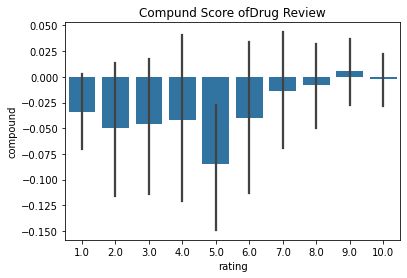

In [27]:
ax = sns.barplot(data=vaders, x='rating', y='compound')
ax.set_title('Compund Score ofDrug Review')
plt.show()

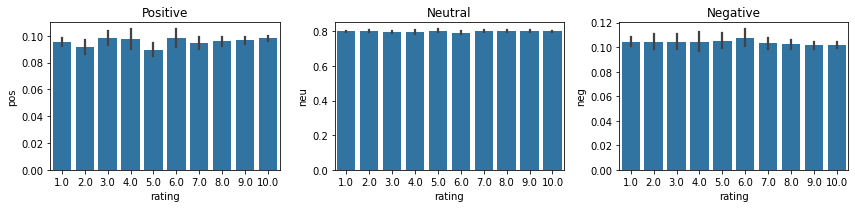

In [28]:
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='rating', y='pos', ax=axs[0])
sns.barplot(data=vaders, x='rating', y='neu', ax=axs[1])
sns.barplot(data=vaders, x='rating', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

In [29]:
# output file path - (Valence Aware Dictionary and Sentiment Reasoner) 
out_file_path='C:/Users/prana/Documents/NCI/PythonWorkSpace/WearableDevices/Data/output/vaders_posNevNut.csv'

#df.to_csv(out_file_path,index=False)

In [30]:
# Step 3. Roberta Pretrained Model
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [31]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [32]:
sample1="i've tried a few antidepressants over the years (citalopram, fluoxetine, amitriptyline), but none of those helped with my depression, insomnia & anxiety. my doctor suggested and changed me onto 45mg mirtazapine and this medicine has saved my life. thankfully i have had no side effects especially the most common - weight gain, i've actually lost alot of weight. i still have suicidal thoughts but mirtazapine has saved me."



In [33]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

polarity_scores_roberta(sample1)

{'roberta_neg': 0.042976625,
 'roberta_neu': 0.19616446,
 'roberta_pos': 0.76085895}

In [34]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['review']
        myid = row['patient_id']
        vader_result = analyzer.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  2%|█▍                                                                            | 189/10000 [00:33<26:58,  6.06it/s]

Broke for id 24509


  8%|██████▏                                                                       | 794/10000 [02:33<17:26,  8.80it/s]

Broke for id 35637


 70%|██████████████████████████████████████████████████████▏                      | 7043/10000 [22:21<08:46,  5.62it/s]

Broke for id 223744


100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [31:45<00:00,  5.25it/s]


In [35]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'patient_id'})
results_df = results_df.merge(df, how='left')

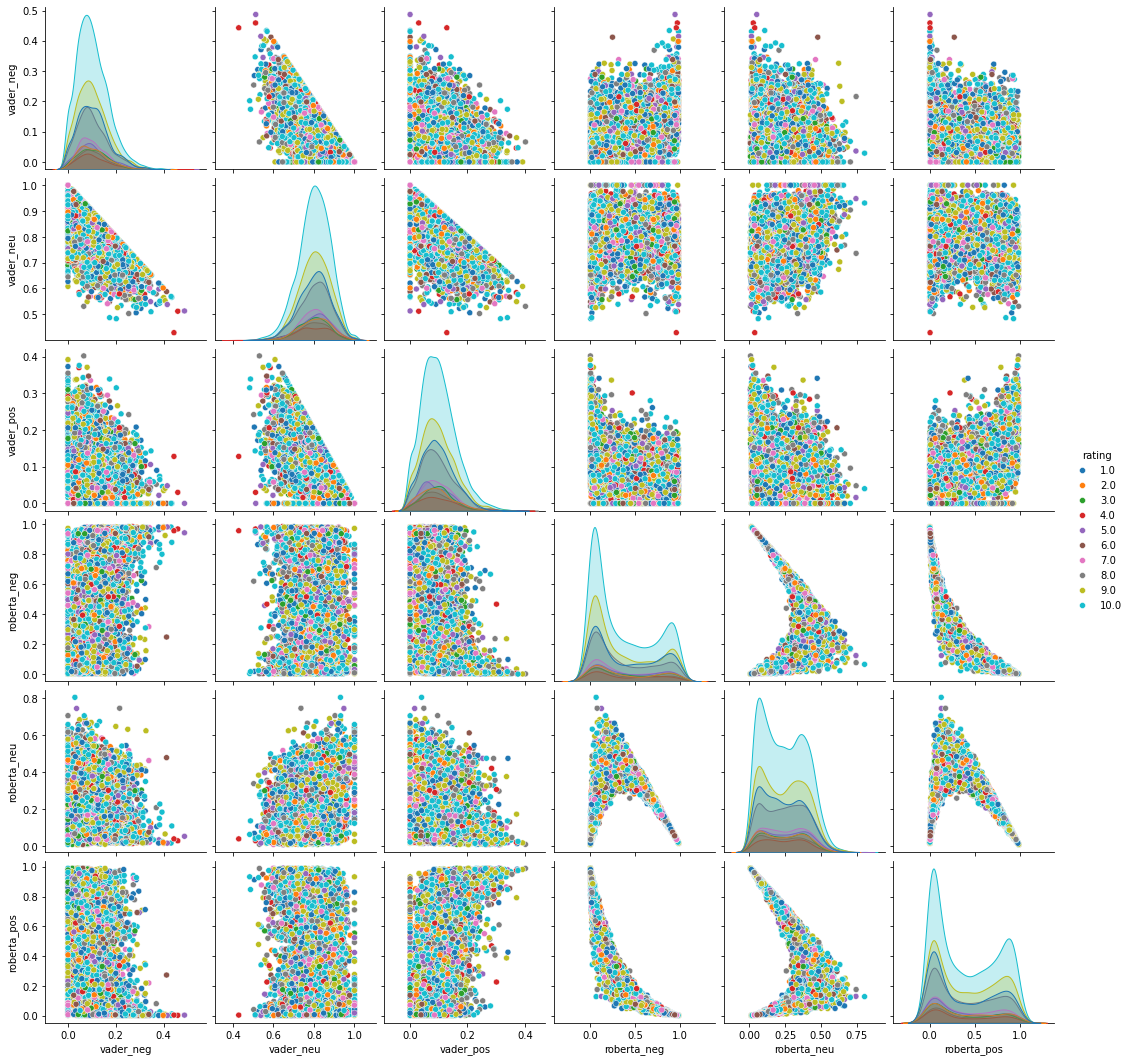

In [36]:
#Step 3. Combine and compare

sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

In [37]:
out_file_path='C:/Users/prana/Documents/NCI/PythonWorkSpace/WearableDevices/Data/output/results_df.csv'

results_df.to_csv(out_file_path,index=False)

In [38]:
results_df.columns

Index(['patient_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Unnamed: 0', 'drugName',
       'condition', 'review', 'rating', 'date', 'usefulCount', 'review_length',
       'polarity', 'subjectivity'],
      dtype='object')

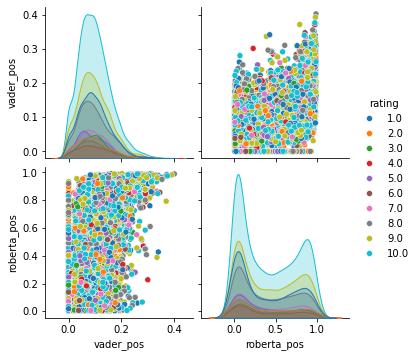

In [39]:
sns.pairplot(data=results_df,
             vars=['vader_pos',
                  'roberta_pos'],
            hue='rating',
            palette='tab10')
plt.show()

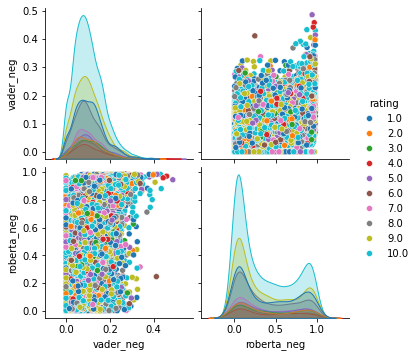

In [40]:
sns.pairplot(data=results_df,
             vars=['vader_neg',
                  'roberta_neg'],
            hue='rating',
            palette='tab10')
plt.show()

<Axes: xlabel='roberta_neg', ylabel='Count'>

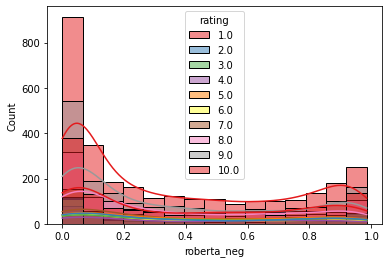

In [41]:

# Create the histogram
sns.histplot(data=results_df, x='roberta_neg', hue='rating', kde=True, palette='Set1', bins=15)


<Axes: xlabel='vader_neg', ylabel='Count'>

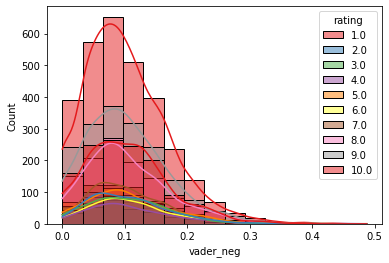

In [42]:
# Create the histogram
sns.histplot(data=results_df, x='vader_neg', hue='rating', kde=True, palette='Set1', bins=15)

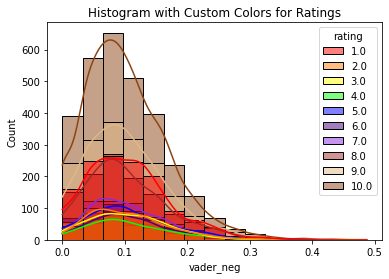

In [43]:
# Define a list of 10 colors for the ratings
custom_colors = [
    "#FF0000", "#FF7F00", "#FFFF00", "#00FF00", "#0000FF", 
    "#4B0082", "#8A2BE2", "#A52A2A", "#DEB887", "#8B4513"
]

# Map the ratings to the colors
rating_color_map = {rating: color for rating, color in zip(range(1, 11), custom_colors)}

# Create the histogram with custom colors
sns.histplot(data=results_df, x='vader_neg', hue='rating', kde=True, 
             palette=rating_color_map, bins=15)

# Show plot
plt.title('Histogram with Custom Colors for Ratings')
plt.show()

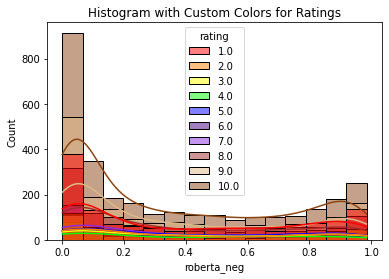

In [44]:
# Define a list of 10 colors for the ratings
custom_colors = [
    "#FF0000", "#FF7F00", "#FFFF00", "#00FF00", "#0000FF", 
    "#4B0082", "#8A2BE2", "#A52A2A", "#DEB887", "#8B4513"
]

# Map the ratings to the colors
rating_color_map = {rating: color for rating, color in zip(range(1, 11), custom_colors)}

# Create the histogram with custom colors
sns.histplot(data=results_df, x='roberta_neg', hue='rating', kde=True, 
             palette=rating_color_map, bins=15)

# Show plot
plt.title('Histogram with Custom Colors for Ratings')
plt.show()

In [ ]:
#### delete below cells ########

In [ ]:
#VADER (Valence Aware Dictionary and Sentiment Reasoner) 

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis VADER
def get_sentiment_VADER (review):
    sentiment = analyzer.polarity_scores(review)
    return sentiment['compound']  # Compound score is typically used as the overall sentiment

# Apply the function to the 'review' column
df['sentiment'] = df['review'].apply(get_sentiment_VADER)

# Display the DataFrame with sentiment scores
print(df[['patient_id', 'drugName', 'condition', 'review', 'sentiment']])

In [ ]:
df.head()

In [ ]:
# samples of vadar 

ax = sns.barplot(data=df, x='rating', y='sentiment')
ax.set_title('Compund Score of Drug Review')
plt.show()

In [ ]:
# Using Bag of Words Vectorization-based Models
#spaCy
df2 = pd.read_csv('../WearableDevices/Data/drug_review_test.csv')



In [ ]:
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)

In [ ]:
text_counts = cv.fit_transform(df2['review'])

In [ ]:
# Convert rating to binary sentiment (positive if rating >= 7, negative if rating < 7)
df2['sentiment_bow'] = df2['rating'].apply(lambda x: 1 if x >= 7 else 0)

In [ ]:
# Create features (X) and labels (y)
X = df2['review']
y = df2['sentiment_bow']

# 3. **Train-Test Split**: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Using Logistic Regression for sentiment classification
model = make_pipeline(CountVectorizer(stop_words='english'), LogisticRegression())

# Train the model
model.fit(X_train, y_train)

# Prediction & Evaluation
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

In [ ]:
# Print precision, recall, F1-score using classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
df3 = pd.read_csv('../WearableDevices/Data/drug_review_test.csv',nrows=10000)

In [ ]:
# Convert rating to binary sentiment (positive if rating >= 7, negative if rating < 7)
df3['sentiment'] = df3['rating'].apply(lambda x: 1 if x >= 7 else 0)

# Create features (X) and labels (y)
X = df3['review']
y = df3['sentiment']

# 2. **Train-Test Split**: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
df3['sentiment']

In [ ]:
# 3. **SVM Model Pipeline**: Use Support Vector Machine with Bag of Words vectorization
svm_model = make_pipeline(CountVectorizer(stop_words='english'), SVC(kernel='rbf', random_state=42))

# 4. **Train the Model**: Fit the model with the training data
svm_model.fit(X_train, y_train)



In [ ]:
# 5. **Prediction**: Use the trained model to make predictions on the test data
y_pred = svm_model.predict(X_test)

# 6. **Evaluate the Model**: Calculate accuracy, confusion matrix, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

In [ ]:
#pip install wordcloud

In [ ]:
import nltk
nltk.download('stopwords')  # Download stopwords
nltk.download('wordnet')    # Download wordnet
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
# https://medium.com/analytics-vidhya/nlp-getting-started-with-sentiment-analysis-126fcd61cc4a

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df4 = pd.read_csv('../WearableDevices/Data/drug_review_test.csv',nrows=10000)

In [ ]:
#object of WordNetLemmatizer
lm = WordNetLemmatizer()
def text_transformation(df_col):
    corpus = []
    for item in df_col:
        new_item = re.sub('[^a-zA-Z]',' ',str(item))
        new_item = new_item.lower()
        new_item = new_item.split()
        new_item = [lm.lemmatize(word) for word in new_item if word not in set(stopwords.words('english'))]
        corpus.append(' '.join(str(x) for x in new_item))
    return corpus
corpus = text_transformation(df4['review'])




In [ ]:
plt.rcParams['figure.figsize'] = 20,8
word_cloud = ""
for row in corpus:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white',min_font_size = 10).generate(word_cloud)
plt.imshow(wordcloud)


In [ ]:

# Convert rating to binary sentiment (positive if rating >= 7, negative if rating < 7)
df4['sentiment'] = df4['rating'].apply(lambda x: 1 if x >= 7 else 0)


In [ ]:
cv = CountVectorizer(ngram_range=(1,2))
traindata = cv.fit_transform(corpus)
X = traindata
y = df4.sentiment

In [ ]:
print(y)

In [ ]:
# Step 3: Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Step 4: Initialize the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)



In [ ]:
# Step 5: Train the model
rf.fit(X_train, y_train)



In [ ]:
# Step 6: Predict using the test set
y_pred = rf.predict(X_test)

# Step 7: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Optional: More detailed performance metrics
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:

# Initialize Random Forest
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Best number of estimators found
print(f"Best n_estimators: {grid_search.best_params_['n_estimators']}")

# Evaluate on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Accuracy of the model
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")



In [ ]:
#Test Data Transformation
testdata_loc='../WearableDevices/Data/drug_review_test.csv'
test_df = pd.read_csv(testdata_loc)
X_test,y_test = test_df.read_csvview,test_df.rating
#encode the labels into two classes , 0 and 1
test_df = custom_encoder(y_test)
#pre-processing of text
test_corpus = text_transformation(X_test)
#convert text data into vectors
testdata = cv.transform(test_corpus)
#predict the target
predictions = rfc.predict(testdata)

In [ ]:
plt.rcParams['figure.figsize'] = 10,5
plot_confusion_matrix(y_test,predictions)
acc_score = accuracy_score(y_test,predictions)
pre_score = precision_score(y_test,predictions)
rec_score = recall_score(y_test,predictions)
print('Accuracy_score: ',acc_score)
print('Precision_score: ',pre_score)
print('Recall_score: ',rec_score)
print("-"*50)
cr = classification_report(y_test,predictions)
print(cr)